In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset loading and Classifier Initialization

In [51]:
genre_names = ['blues', 'classical', 'country', 'disco', 'hipop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
centroids = list()

In [52]:
data = pd.read_csv('./test_dataset.csv')
data_mean = data.mean()
data_std = data.std()

data_normalized = (data - data_mean) / data_std

# Separation between test set and training set

dataset_size = data_normalized.shape[0]
limit = int(dataset_size * 0.8)

indices = list(range(dataset_size))

np.random.shuffle(indices)

training_indices = indices[0:limit]
test_indices = indices[limit:]

data_as_array = data_normalized.to_numpy()

training_set = data_as_array[training_indices, 1:4]
training_set_labels = np.array(training_indices) // 100

test_set = data_as_array[test_indices, 1:4]
test_set_labels = np.array(test_indices) // 100

# Centroid computation

centroids = list()
for class_index in range(10):
  partial_set = training_set[training_set_labels == class_index,:]
  class_centroid = partial_set.mean(axis=0)
  centroids.append(class_centroid)

# Centroid Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

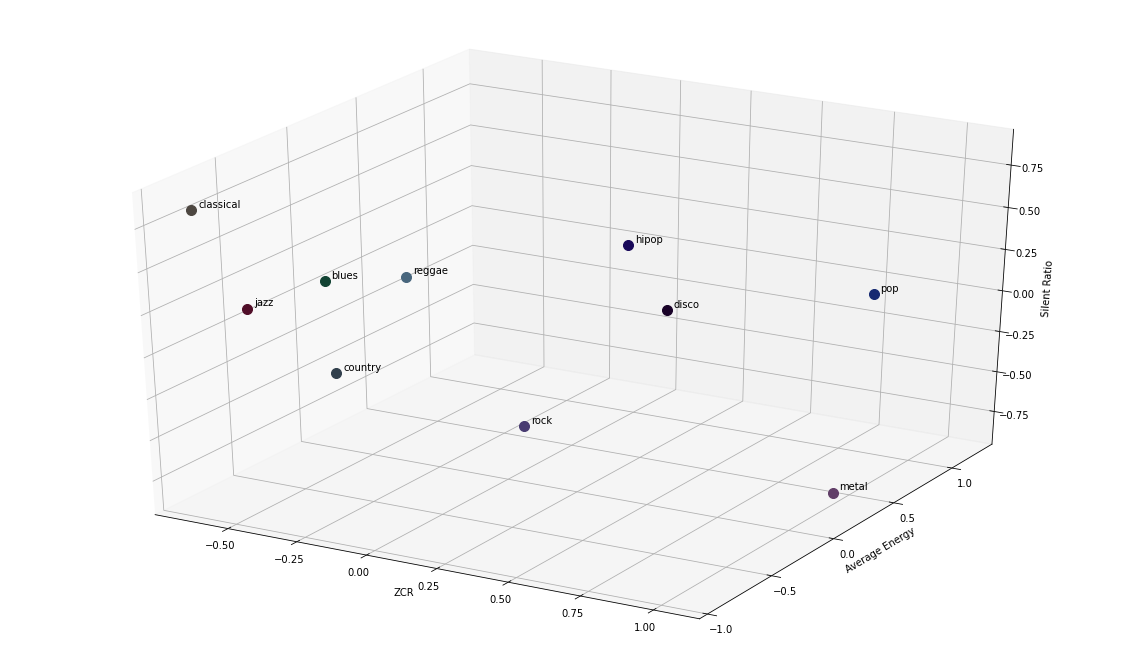

In [53]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

text_offset = 0.05

for i, centroid in enumerate(centroids):
  color_rgb = np.random.rand(3,) * 0.5
  ax.scatter(centroid[0], centroid[1], centroid[2], label = genre_names[i], c=color_rgb, s = 100)
  ax.text(centroid[0], centroid[1] + text_offset, centroid[2], genre_names[i])

ax.set_xlabel('ZCR')
ax.set_ylabel('Average Energy')
ax.set_zlabel('Silent Ratio')

fig.show()

# Classifier

In [54]:
# Input format (ZCR, AVERAGE_ENERGY, SILENT_RATIO)
def classify(input, genres_to_classify=genre_names, distance=np.linalg.norm, debug_mode=False):
  min_distance = np.infty
  current_closest = ''
  for i, genre in enumerate(genre_names):
    if not genre in genres_to_classify:
      continue

    current_centroid = centroids[i]
    buffer = distance(input - current_centroid)
    if buffer < min_distance:
      min_distance = buffer
      current_closest = genre

    if debug_mode : print('Sample distance from ' + genre + ' is ' + str(buffer))

  return current_closest

In [55]:
index = 102
real_class = genre_names[index // 100]

test_input = np.array([data_normalized['ZCR'].to_numpy()[index], data_normalized['AVERAGE_ENERGY'].to_numpy()[index], data_normalized['SILENT_RATIO'].to_numpy()[index]])
print("classified as " + classify(test_input) + " should be " + real_class)

classified as country should be classical


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

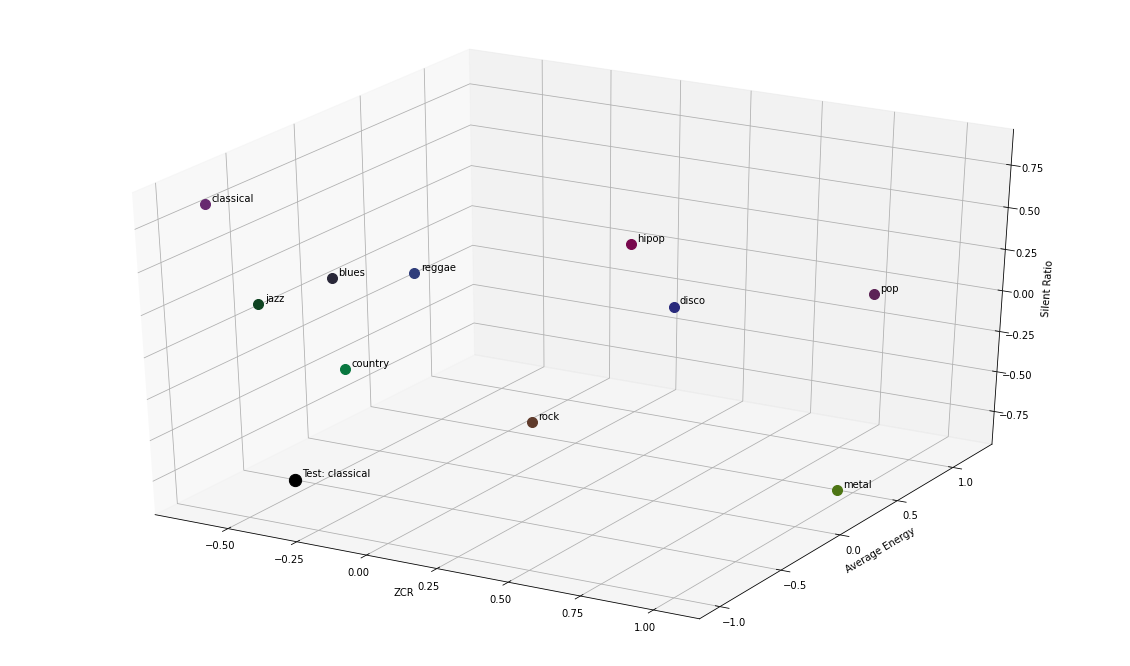

In [56]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(projection='3d')

text_offset = 0.05

for i, centroid in enumerate(centroids):
  color_rgb = np.random.rand(3,) * 0.5
  ax.scatter(centroid[0], centroid[1], centroid[2], label = genre_names[i], c=color_rgb, s = 100)
  ax.text(centroid[0], centroid[1] + text_offset, centroid[2], genre_names[i])

ax.scatter(test_input[0], test_input[1], test_input[2], color = 'black', s=150)
ax.text(test_input[0], test_input[1] + text_offset, test_input[2], 'Test: ' + real_class)

ax.set_xlabel('ZCR')
ax.set_ylabel('Average Energy')
ax.set_zlabel('Silent Ratio')

fig.show()

### Confusion Matrix (with all 10 genres)

In [57]:
confusion_matrix = np.zeros((10, 10))

test_count = test_set.shape[0]

for test_index in range(test_count):
  true_class_index = test_set_labels[test_index]
  true_class = genre_names[true_class_index]

  input_vector = test_set[test_index,:]
  predicted = classify(input_vector)

  predicted_index = genre_names.index(predicted)

  confusion_matrix[true_class_index, predicted_index] += 1

In [58]:
print(confusion_matrix)

[[ 3.  4.  2.  1.  1.  0.  1.  2.  0.  6.]
 [ 0. 11.  1.  1.  0.  5.  0.  0.  0.  1.]
 [ 0.  1.  7.  1.  1.  0.  2.  1.  0.  1.]
 [ 0.  1.  0.  7.  0.  0.  6.  0.  0.  2.]
 [ 1.  1.  1.  4.  4.  0.  2.  5.  0.  2.]
 [ 0.  5.  5.  1.  0.  9.  0.  0.  0.  1.]
 [ 0.  0.  1.  5.  0.  0.  9.  2.  0.  2.]
 [ 0.  1.  2.  2.  4.  1.  2. 11.  1.  0.]
 [ 2.  3.  1.  3.  1.  5.  1.  1.  2.  1.]
 [ 2.  2.  8.  5.  0.  1.  5.  0.  0.  4.]]


In [59]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
accuracy

0.335

### Confusion Matrix (with 2 genres)

In [68]:
input_genres = ['classical', 'pop']
genre_indices = list()
k = len(input_genres)

for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

confusion_matrix = np.zeros((k,k))

test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  predicted_index = input_genres.index(predicted)

  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

confusion_matrix

array([[18.,  1.],
       [ 4., 20.]])

In [69]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
accuracy

0.8837209302325582

### Confusion Matrix (with 6 genres)

In [70]:
input_genres = ['blues', 'classical', 'country', 'disco', 'pop', 'rock']
genre_indices = list()
k = len(input_genres)

for genre_n in input_genres: genre_indices.append(genre_names.index(genre_n))

confusion_matrix = np.zeros((k,k))

test_set_filter = np.zeros(test_set.shape[0], dtype='bool')
for j in range(test_set.shape[0]):
  test_set_filter[j] = test_set_labels[j] in genre_indices

partial_test_set = test_set[test_set_filter,:]
partial_test_labels = test_set_labels[test_set_filter]
partial_test_count = partial_test_set.shape[0]

for test_index in range(partial_test_count):
  true_class_index = partial_test_labels[test_index]
  true_class = genre_names[true_class_index]

  input_vector = partial_test_set[test_index,:]
  predicted = classify(input_vector, genres_to_classify = input_genres)

  predicted_index = input_genres.index(predicted)

  confusion_matrix[genre_indices.index(true_class_index), predicted_index] += 1

confusion_matrix

array([[ 4.,  4.,  2.,  1.,  2.,  7.],
       [ 0., 14.,  3.,  1.,  0.,  1.],
       [ 1.,  1.,  7.,  1.,  2.,  2.],
       [ 0.,  1.,  0.,  7.,  3.,  5.],
       [ 0.,  2.,  2.,  4., 16.,  0.],
       [ 2.,  2.,  9.,  7.,  1.,  6.]])

In [71]:
accuracy = confusion_matrix.trace() / confusion_matrix.sum()
accuracy

0.45